In [1]:
import numpy as np
import pandas as pd

In [2]:
s1 = pd.DataFrame(np.random.randint(80,100, (15000,5)), columns=["s1","s2","s3","s4","s5"])
s2 = pd.DataFrame(np.random.randint(70,79, (15000,5)), columns=["s1","s2","s3","s4","s5"])
s3 = pd.DataFrame(np.random.randint(60,69, (15000,5)), columns=["s1","s2","s3","s4","s5"])
s4 = pd.DataFrame(np.random.randint(50,59, (15000,5)), columns=["s1","s2","s3","s4","s5"])
s5 = pd.DataFrame(np.random.randint(40,49, (15000,5)), columns=["s1","s2","s3","s4","s5"])
s6 = pd.DataFrame(np.random.randint(33,39, (15000,5)), columns=["s1","s2","s3","s4","s5"])
s7 = pd.DataFrame(np.random.randint(0,32, (15000,5)), columns=["s1","s2","s3","s4","s5"])

df = pd.concat([s1,s2,s3,s4,s5,s6,s7])
df.head()

,s1,s2,s3,s4,s5
0,85,88,92,82,96
1,98,94,91,98,90
2,91,98,86,87,86
3,83,94,89,84,89
4,89,83,85,90,93


# Symbolic AI

In [3]:
def grade(sb1,sb2,sb3,sb4,sb5):
    total = sb1+sb2+sb3+sb4+sb5
    per = total/500*100
    grade = "Null"
    if per>=80:
        grade = "A+"
    elif per>=70:
        grade ="A"
    elif per>=60:
        grade = "B"
    elif per>=50:
        grade = "C"
    elif per>=40:
        grade = "D"
    elif per>=33:
        grade = "E"
    elif per>=0:
        grade = "Fail"
    
    return grade, 500
    
    
df['grade'] = df.loc[:,"s1":"s5"].apply(lambda x:grade(*x), axis=1)
df.grade.value_counts()

(A+, 500)      15000
(A, 500)       15000
(B, 500)       15000
(C, 500)       15000
(D, 500)       15000
(E, 500)       15000
(Fail, 500)    15000
Name: grade, dtype: int64

In [4]:
def grade(sb1,sb2,sb3,sb4,sb5):
    obtained = sb1+sb2+sb3+sb4+sb5
    per = obtained/500*100
    grade = "Null"
    if per>=80:
        grade = "A+"
    elif per>=70:
        grade ="A"
    elif per>=60:
        grade = "B"
    elif per>=50:
        grade = "C"
    elif per>=40:
        grade = "D"
    elif per>=33:
        grade = "E"
    elif per>=0:
        grade = "Fail"
    
    return grade, 500, obtained, per
    
    


In [5]:
    
df[["grade","total","obtained",'percentage']] = df.loc[:,"s1":"s5"].apply(lambda x:grade(*x), axis=1, result_type='expand' )
df.head()

,s1,s2,s3,s4,s5,grade,total,obtained,percentage
0,85,88,92,82,96,A+,500,443,88.6
1,98,94,91,98,90,A+,500,471,94.2
2,91,98,86,87,86,A+,500,448,89.6
3,83,94,89,84,89,A+,500,439,87.8
4,89,83,85,90,93,A+,500,440,88.0


# create data for ML and DL

In [28]:
data = df[["s1","s2","s3","s4","s5",'percentage','grade']].copy()
data

,s1,s2,s3,s4,s5,percentage,grade
0,85,88,92,82,96,88.6,A+
1,98,94,91,98,90,94.2,A+
2,91,98,86,87,86,89.6,A+
3,83,94,89,84,89,87.8,A+
4,89,83,85,90,93,88.0,A+
...,...,...,...,...,...,...,...
14995,20,22,5,15,30,18.4,Fail
14996,6,22,29,15,28,20.0,Fail
14997,13,31,0,3,10,11.4,Fail
14998,15,13,30,14,23,19.0,Fail


<AxesSubplot:>

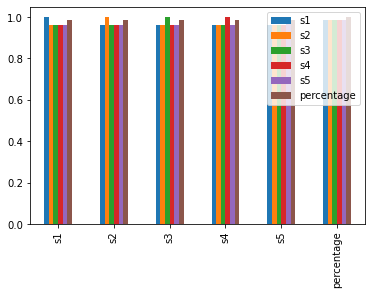

In [29]:
data.corr().plot(kind='bar')

In [30]:
# now change grade column into numbers sequance based on grade
grades = {
    "A+":7,
    "A":6,
    "B":5,
    "C":4,
    "D":3,
    "E":2,
    "Fail":1
}
data['grade1'] = data['grade'].map(grades)
data.head()

,s1,s2,s3,s4,s5,percentage,grade,grade1
0,85,88,92,82,96,88.6,A+,7
1,98,94,91,98,90,94.2,A+,7
2,91,98,86,87,86,89.6,A+,7
3,83,94,89,84,89,87.8,A+,7
4,89,83,85,90,93,88.0,A+,7


In [31]:
data.drop_duplicates(inplace=True)
print(len(data))

89663


<AxesSubplot:>

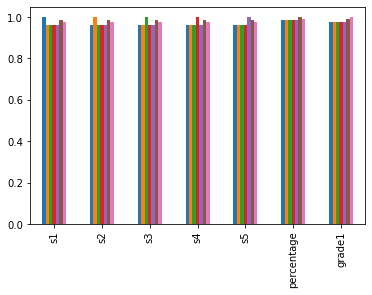

In [32]:
data.corr().plot(kind='bar',legend=False)

In [34]:
data[['percentage','grade1']].corr()#.plot(kind='bar')

,percentage,grade1
percentage,1.000000,0.990693
grade1,0.990693,1.000000


# Find Grade (Rules) with Machine Learning

In [35]:
from sklearn.tree import DecisionTreeClassifier# classifier
from sklearn.model_selection import train_test_split# spliting data
from sklearn import metrics# accuracy, f1 score....

## Now select feature selection based above stats technique

In [36]:
features = ["percentage"]# selected columns names

X = data[features]
Y = data.grade

In [37]:
X.head()

,percentage
0,88.6
1,94.2
2,89.6
3,87.8
4,88.0


In [38]:
Y.head()

0    A+
1    A+
2    A+
3    A+
4    A+
Name: grade, dtype: object

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)
display(X_train,len(X_train))
display(X_test,len(X_test))


,percentage
6485,44.0
2152,53.6
1441,35.4
14011,44.4
5738,15.2
...,...
6802,75.6
9018,35.8
9251,53.8
5193,86.0


62764

,percentage
14941,17.0
14899,72.4
14307,63.8
6142,93.4
9693,34.8
...,...
14516,45.6
5270,92.6
5549,64.6
375,74.0


26899

# Classifer

In [43]:
clf = DecisionTreeClassifier()

# Train classifier

In [44]:
clf = clf.fit(X_train, Y_train)

# Test

In [45]:
y_pred = clf.predict(X_test)

In [56]:
clf.predict([[75]])

array(['A'], dtype=object)

In [46]:
print(y_pred)

['Fail' 'A' 'B' ... 'B' 'A' 'C']


In [48]:
print("Actual label",Y_test.values)

Actual label ['Fail' 'A' 'B' ... 'B' 'A' 'C']


# Now Check accuracy of our classifer

In [49]:
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 1.0


# Display learning rules

In [50]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(523.125, 504.7714285714286, 'X[0] <= 30.8\ngini = 0.851\nsamples = 62764\nvalue = [9153, 10470, 9325, 9370, 9242, 4680, 10524]\nclass = y[6]'),
 Text(418.5, 427.11428571428576, 'gini = 0.0\nsamples = 10524\nvalue = [0, 0, 0, 0, 0, 0, 10524]\nclass = y[6]'),
 Text(627.75, 427.11428571428576, 'X[0] <= 79.1\ngini = 0.826\nsamples = 52240\nvalue = [9153, 10470, 9325, 9370, 9242, 4680, 0]\nclass = y[1]'),
 Text(523.125, 349.4571428571429, 'X[0] <= 69.1\ngini = 0.79\nsamples = 41770\nvalue = [9153, 0, 9325, 9370, 9242, 4680, 0]\nclass = y[3]'),
 Text(418.5, 271.8, 'X[0] <= 58.9\ngini = 0.735\nsamples = 32617\nvalue = [0, 0, 9325, 9370, 9242, 4680, 0]\nclass = y[3]'),
 Text(313.875, 194.14285714285717, 'X[0] <= 49.1\ngini = 0.64\nsamples = 23292\nvalue = [0, 0, 0, 9370, 9242, 4680, 0]\nclass = y[3]'),
 Text(209.25, 116.48571428571432, 'X[0] <= 39.0\ngini = 0.446\nsamples = 13922\nvalue = [0, 0, 0, 0, 9242, 4680, 0]\nclass = y[4]'),
 Text(104.625, 38.82857142857142, 'gini = 0.0\nsamples 

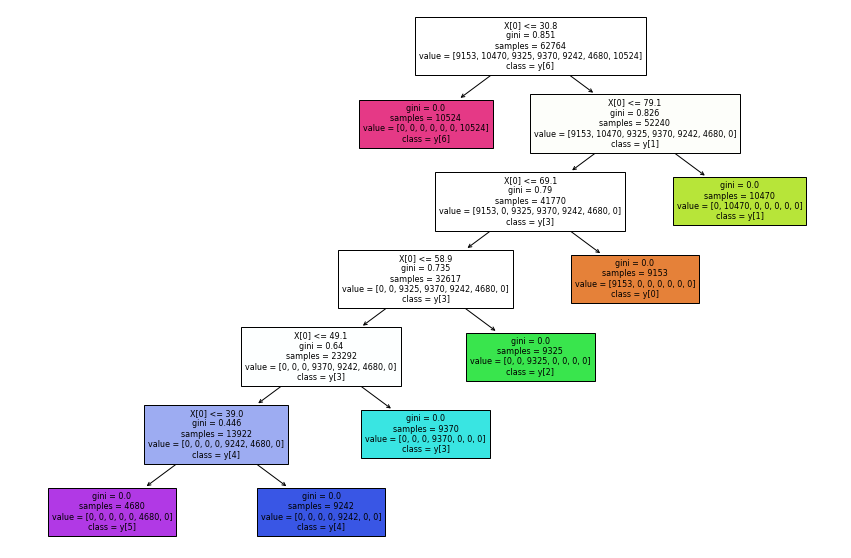

In [51]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=tree, class_names=True,
              fontsize=8)

### one-hot encoding

In [8]:
X = data.loc[:,"s1":"s5"] # input
X

,s1,s2,s3,s4,s5
0,91,82,98,83,91
1,99,99,80,89,88
2,92,86,90,82,87
3,89,97,91,98,85
4,92,81,98,89,98
...,...,...,...,...,...
9995,19,0,3,15,26
9996,4,22,3,6,12
9997,27,10,2,26,20
9998,8,28,10,17,11


In [9]:
y = data['grade']
y

0         A+
1         A+
2         A+
3         A+
4         A+
        ... 
9995    Fail
9996    Fail
9997    Fail
9998    Fail
9999    Fail
Name: grade, Length: 70000, dtype: object

#### convert into onehotencode

In [10]:
y = pd.get_dummies(y)
y

,A,A+,B,C,D,E,Fail
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,1
9996,0,0,0,0,0,0,1
9997,0,0,0,0,0,0,1
9998,0,0,0,0,0,0,1


In [11]:
y.drop_duplicates()

,A,A+,B,C,D,E,Fail
0,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0
0,0,0,1,0,0,0,0
0,0,0,0,1,0,0,0
0,0,0,0,0,1,0,0
0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,1


<img src="https://i0.wp.com/semiengineering.com/wp-content/uploads/2018/01/MLvsDL.png?ssl=1">

In [20]:
X.head(1).values[0].shape

(5,)

# Deep learning

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

# Create model

In [24]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(5,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))# 7 number of classes, activation directly relate with problem

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                192       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 7)                 119       
                                                                 
Total params: 839
Trainable params: 839
Non-trainable params: 0
_________________________________________________________________


# Compilation process

In [26]:
model.compile(optimizer=SGD(learning_rate=0.002),
             loss='categorical_crossentropy',
             metrics=['acc'])

# Now Start Training

In [27]:
model.fit(X,y, epochs=70)

Epoch 1/70
2188/2188 [==============================] - 2s 562us/step - loss: 1.6456 - acc: 0.2821
Epoch 2/70
2188/2188 [==============================] - 1s 571us/step - loss: 1.4625 - acc: 0.3297
Epoch 3/70
2188/2188 [==============================] - 1s 559us/step - loss: 1.4035 - acc: 0.3649
Epoch 4/70
2188/2188 [==============================] - 1s 547us/step - loss: 1.3474 - acc: 0.4122
Epoch 5/70
2188/2188 [==============================] - 1s 569us/step - loss: 1.2919 - acc: 0.4563
Epoch 6/70
2188/2188 [==============================] - 1s 551us/step - loss: 1.2400 - acc: 0.4950
Epoch 7/70
2188/2188 [==============================] - 1s 555us/step - loss: 1.1978 - acc: 0.5362
Epoch 8/70
2188/2188 [==============================] - 1s 558us/step - loss: 1.1645 - acc: 0.5788
Epoch 9/70
2188/2188 [==============================] - 1s 550us/step - loss: 1.1358 - acc: 0.6057
Epoch 10/70
2188/2188 [==============================] - 1s 578us/step - loss: 1.1091 - acc: 0.6194
Epoch 11/

# Generate Test data

In [59]:
df1 = pd.DataFrame(np.random.randint(50,100, (20,5)),
                  columns=["s1","s2","s3","s4","s5"])
df1

,s1,s2,s3,s4,s5
0,92,67,75,61,50
1,64,76,80,59,63
2,95,59,52,60,69
3,91,85,59,62,86
4,57,58,97,99,76
5,90,53,69,63,72
6,81,95,89,57,63
7,54,54,82,96,99
8,95,92,54,54,67
9,87,86,57,97,82


In [60]:
model.predict([[90,87,95,88,94]])

1/1 [==============================] - 0s 24ms/step


array([[6.4931762e-01, 3.2409874e-01, 2.6569059e-02, 1.4507507e-05,
        2.3383218e-12, 1.1573684e-26, 9.1472877e-22]], dtype=float32)

In [61]:
y.columns

Index(['A', 'A+', 'B', 'C', 'D', 'E', 'Fail'], dtype='object')

In [62]:
np.argmax(model.predict([[50,55,50,53,54]]))

1/1 [==============================] - 0s 23ms/step


3

In [63]:
y.columns[np.argmax(model.predict([[50,55,50,53,54]]))]

1/1 [==============================] - 0s 21ms/step


'C'

In [65]:
df1['predicte_y'] = [y.columns[np.argmax(i)] for i in model.predict(df1)]
df1

1/1 [==============================] - 0s 13ms/step


,s1,s2,s3,s4,s5,predicte_y
0,92,67,75,61,50,Fail
1,64,76,80,59,63,A+
2,95,59,52,60,69,Fail
3,91,85,59,62,86,Fail
4,57,58,97,99,76,Fail
5,90,53,69,63,72,Fail
6,81,95,89,57,63,Fail
7,54,54,82,96,99,Fail
8,95,92,54,54,67,Fail
9,87,86,57,97,82,A+


In [66]:
model.save('grading_model')

INFO:tensorflow:Assets written to: grading_model\assets


INFO:tensorflow:Assets written to: grading_model\assets


In [67]:
ml = tf.keras.models.load_model("grading_model")
ml.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                192       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 7)                 119       
                                                                 
Total params: 839
Trainable params: 839
Non-trainable params: 0
_________________________________________________________________


In [69]:
import re
x="""
Bilal Uddin4:50 PM
4220122191357
Farrukh Jalil4:59 PM
42101-1397876-3
Syed Sajjad Ali Shah4:59 PM
1510120026221
Muneeb Abdul Rauf4:59 PM
4230181544787
Imran Ali5:01 PM
4210176950677
TARIQ JAMIL5:02 PM
42501-8229854-5
Nadir Ali5:02 PM
4130311530273
Syeda Zehra Nadeem5:10 PM
4230123587896
Ahmed Saud5:10 PM
4210176752885
Agha Zohaib5:10 PM
4210168710111
Syed Abbas Abbas5:10 PM
1234567890123
Syed Mohammad Asad Asad5:21 PM
4240180561365
Kenneth Fahad5:27 PM
3310541597331
Syed Umair Ahmed5:29 PM
4130485196673
syed daniyal5:30 PM
4250189782769
Syed Zaim Nazir5:32 PM
4220171026219
Madiha Obaid Obaid5:34 PM
4220105920780
Abdullah Mukhtar6:10 PM
4210175758189
Muhammad Fahad6:15 PM
4210117498405
Bilal Uddin6:17 PM
4220122191357
Zoya Ansari6:17 PM
4220186465696
Rizwan Ali6:17 PM
4230174256393
Javeria Abbasi6:17 PM
4220140843098
MUSTAFA NADIMI6:18 PM
5440053241639
mcc-qjtf-rix
""".replace("-","")
cnic = pd.DataFrame(list(set(re.findall('\d{13}',x))),columns=["CNIC"])
print(len(cnic))
cnic

23


,CNIC
0,4240180561365
1,4230174256393
2,5440053241639
3,4210175758189
4,4210168710111
5,4210113978763
6,4130485196673
7,4220171026219
8,4220105920780
9,1234567890123
